In [27]:
# Import Libraries

import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot

In [55]:
# Settings
%matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',200)
pd.options.display.float_format= '{:.2f}'.format

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

In [91]:
# Import customized functions inside Pandas

%run pandas-missing-extension.ipynb

In [2]:
pima_indians_diabetes_url = "https://nrvis.com/data/mldata/pima-indians-diabetes.csv"

In [15]:
!wget -O ./data/pima-indians-diabetes.csv { pima_indians_diabetes_url } -q

In [16]:
df_diabetes = pd.read_csv(
    "./data/pima-indians-diabetes.csv",
    sep=',',
    names=[
        "pregnancies",
        "glucose",
        "blood_pressure",
        "skin_thickness",
        "insulin",
        "bmi",
        "diabetes_pedigree_function",
        "age",
        "outcome"]
)
df_diabetes

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
base_url = "https://github.com/njtierney/naniar/raw/master/data/"
datasets_names = ("oceanbuoys", "pedestrian", "riskfactors")
extension = ".rda"

#### Download and load datasets

In [18]:
datasets_dfs = {}

for dataset_name in datasets_names:

    dataset_file = f"{ dataset_name }{ extension }"
    dataset_output_file = f"./data/{ dataset_file }"
    dataset_url = f"{ base_url }{ dataset_file }"
    
    !wget -q -O { dataset_output_file } { dataset_url }

    datasets_dfs[f"df_{ dataset_name }"] = pyreadr.read_r(dataset_output_file).get(dataset_name)

datasets_dfs.keys()

dict_keys(['df_oceanbuoys', 'df_pedestrian', 'df_riskfactors'])

In [19]:
locals().update(**datasets_dfs)
del datasets_dfs

In [20]:
df_oceanbuoys.shape, df_pedestrian.shape, df_riskfactors.shape

((736, 8), (37700, 9), (245, 34))

In [21]:
df_oceanbuoys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        736 non-null    float64
 1   latitude    736 non-null    float64
 2   longitude   736 non-null    float64
 3   sea_temp_c  733 non-null    float64
 4   air_temp_c  655 non-null    float64
 5   humidity    643 non-null    float64
 6   wind_ew     736 non-null    float64
 7   wind_ns     736 non-null    float64
dtypes: float64(8)
memory usage: 46.1 KB


In [22]:
df_oceanbuoys.head()

,year,latitude,longitude,sea_temp_c,air_temp_c,humidity,wind_ew,wind_ns
0,1997.0,0.0,-110.0,27.590000,27.15,79.599998,-6.4,5.4
1,1997.0,0.0,-110.0,27.549999,27.02,75.800003,-5.3,5.3
2,1997.0,0.0,-110.0,27.570000,27.00,76.500000,-5.1,4.5
3,1997.0,0.0,-110.0,27.620001,26.93,76.199997,-4.9,2.5
4,1997.0,0.0,-110.0,27.650000,26.84,76.400002,-3.5,4.1


In [23]:
df_pedestrian.head()

,hourly_counts,date_time,year,month,month_day,week_day,hour,sensor_id,sensor_name
0,883,2016-01-01 00:00:00,2016,January,1,Friday,0,2,Bourke Street Mall (South)
1,597,2016-01-01 01:00:00,2016,January,1,Friday,1,2,Bourke Street Mall (South)
2,294,2016-01-01 02:00:00,2016,January,1,Friday,2,2,Bourke Street Mall (South)
3,183,2016-01-01 03:00:00,2016,January,1,Friday,3,2,Bourke Street Mall (South)
4,118,2016-01-01 04:00:00,2016,January,1,Friday,4,2,Bourke Street Mall (South)


In [24]:
df_riskfactors.head()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104


In [25]:
df_pedestrian.isna().sum()

hourly_counts    2548
date_time           0
year                0
month               0
month_day           0
week_day            0
hour                0
sensor_id           0
sensor_name         0
dtype: int64

In [26]:
df_riskfactors.isna().sum()

state                 0
sex                   0
age                   0
weight_lbs           10
height_inch           2
bmi                  11
marital               1
pregnant            215
children              0
education             1
employment            0
income                0
veteran               3
hispanic              2
health_general        0
health_physical       0
health_mental         0
health_poor         113
health_cover          0
provide_care          3
activity_limited      3
drink_any             2
drink_days          134
drink_average       135
smoke_100             2
smoke_days          128
smoke_stop          212
smoke_last          161
diet_fruit            8
diet_salad            8
diet_potato           8
diet_carrot           8
diet_vegetable        8
diet_juice            8
dtype: int64

In [31]:
df_riskfactors.shape

df_riskfactors.missing.number_complete()


df_riskfactors.missing.number_missing()

df_riskfactors.missing.missing_variable_summary()

df_riskfactors.missing.missing_variable_table()

df_riskfactors.missing.missing_case_summary()

df_riskfactors.missing.missing_case_table()

(
    df_riskfactors
    .missing
    .missing_variable_span(
        variable="weight_lbs",
        span_every=50
    )
)

(
    df_riskfactors
    .missing
    .missing_variable_run(
        variable="weight_lbs"
    )
)


,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


In [32]:
df_riskfactors.head()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104


In [34]:
df_riskfactors.shape

(245, 34)

In [33]:
df_riskfactors.isna().sum()

state                 0
sex                   0
age                   0
weight_lbs           10
height_inch           2
bmi                  11
marital               1
pregnant            215
children              0
education             1
employment            0
income                0
veteran               3
hispanic              2
health_general        0
health_physical       0
health_mental         0
health_poor         113
health_cover          0
provide_care          3
activity_limited      3
drink_any             2
drink_days          134
drink_average       135
smoke_100             2
smoke_days          128
smoke_stop          212
smoke_last          161
diet_fruit            8
diet_salad            8
diet_potato           8
diet_carrot           8
diet_vegetable        8
diet_juice            8
dtype: int64

In [36]:
df_riskfactors.size

8330

In [39]:
df_riskfactors.missing.number_complete()+df_riskfactors.missing.number_missing()

8330

In [40]:
df_riskfactors.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


In [50]:
df_riskfactors.shape

(245, 34)

In [49]:
df_riskfactors.isnull().sum()

state                 0
sex                   0
age                   0
weight_lbs           10
height_inch           2
bmi                  11
marital               1
pregnant            215
children              0
education             1
employment            0
income                0
veteran               3
hispanic              2
health_general        0
health_physical       0
health_mental         0
health_poor         113
health_cover          0
provide_care          3
activity_limited      3
drink_any             2
drink_days          134
drink_average       135
smoke_100             2
smoke_days          128
smoke_stop          212
smoke_last          161
diet_fruit            8
diet_salad            8
diet_potato           8
diet_carrot           8
diet_vegetable        8
diet_juice            8
dtype: int64

In [53]:
f = df_riskfactors.missing.missing_variable_table()
f

,n_missing_in_variable,n_variables,pct_variables
0,0,10,29.411765
1,8,6,17.647059
2,2,4,11.764706
3,3,3,8.823529
4,1,2,5.882353
5,10,1,2.941176
6,11,1,2.941176
7,113,1,2.941176
8,128,1,2.941176
9,134,1,2.941176


In [73]:
df_riskfactors.missing.missing_case_summary()#.sort_values(by='n_missing', ascending=False)

,case,n_missing,pct_missing
0,0,6,16.67
1,1,6,16.67
2,2,7,19.44
3,3,12,33.33
4,4,5,13.89
...,...,...,...
240,240,6,16.67
241,241,5,13.89
242,242,3,8.33
243,243,2,5.56


In [56]:
df_riskfactors.head()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,employment,income,veteran,hispanic,health_general,health_physical,health_mental,health_poor,health_cover,provide_care,activity_limited,drink_any,drink_days,drink_average,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,2,35-50k,5,No,Good,3,15,2,Yes,No,Yes,No,NaN,NaN,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,1,35-50k,5,No,Fair,4,30,3,Yes,No,No,No,NaN,NaN,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,5,<10k,5,Yes,Fair,0,0,NaN,Yes,No,No,No,NaN,NaN,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,1,>75k,5,No,Excellent,0,0,NaN,Yes,No,No,Yes,15,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,1,50-75k,5,No,Excellent,0,0,NaN,Yes,No,No,No,NaN,NaN,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104


In [70]:
df_riskfactors.missing.missing_case_table().sort_values(by='n_missing_in_case', ascending=False)

,n_missing_in_case,n_cases,pct_case
9,15,2,0.82
8,12,3,1.22
12,11,1,0.41
11,10,1,0.41
10,9,1,0.41
7,8,3,1.22
2,7,39,15.92
3,6,36,14.69
1,5,45,18.37
0,4,49,20.00


In [74]:
(
    df_riskfactors.missing.missing_variable_span(
        variable='weight_lbs',
        span_every=50
    )
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,49,2.00,98.00
1,1,5,45,10.00,90.00
2,2,1,49,2.00,98.00
3,3,1,49,2.00,98.00
4,4,2,43,4.44,95.56


In [75]:
(
    df_riskfactors.missing.missing_variable_run(
        variable='weight_lbs',
        
    )
)

,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


## Using plots

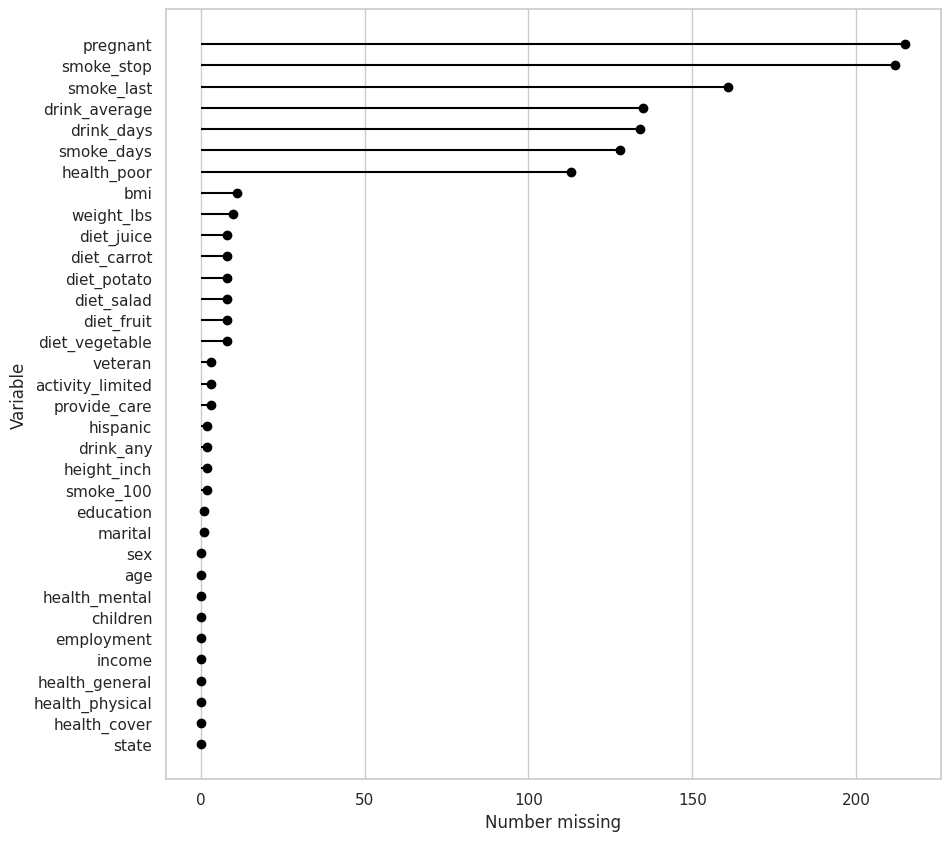

In [76]:
df_riskfactors.missing.missing_variable_plot()

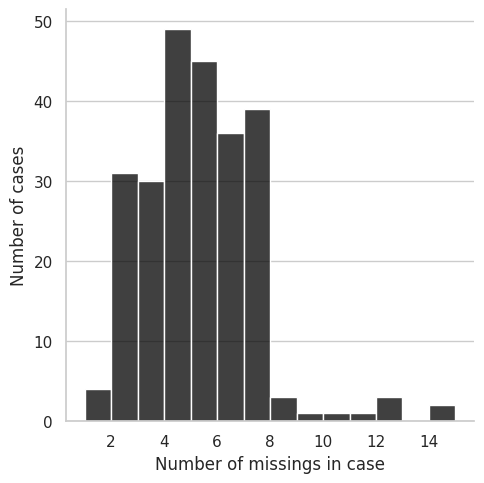

In [79]:
df_riskfactors.missing.missing_case_plot()

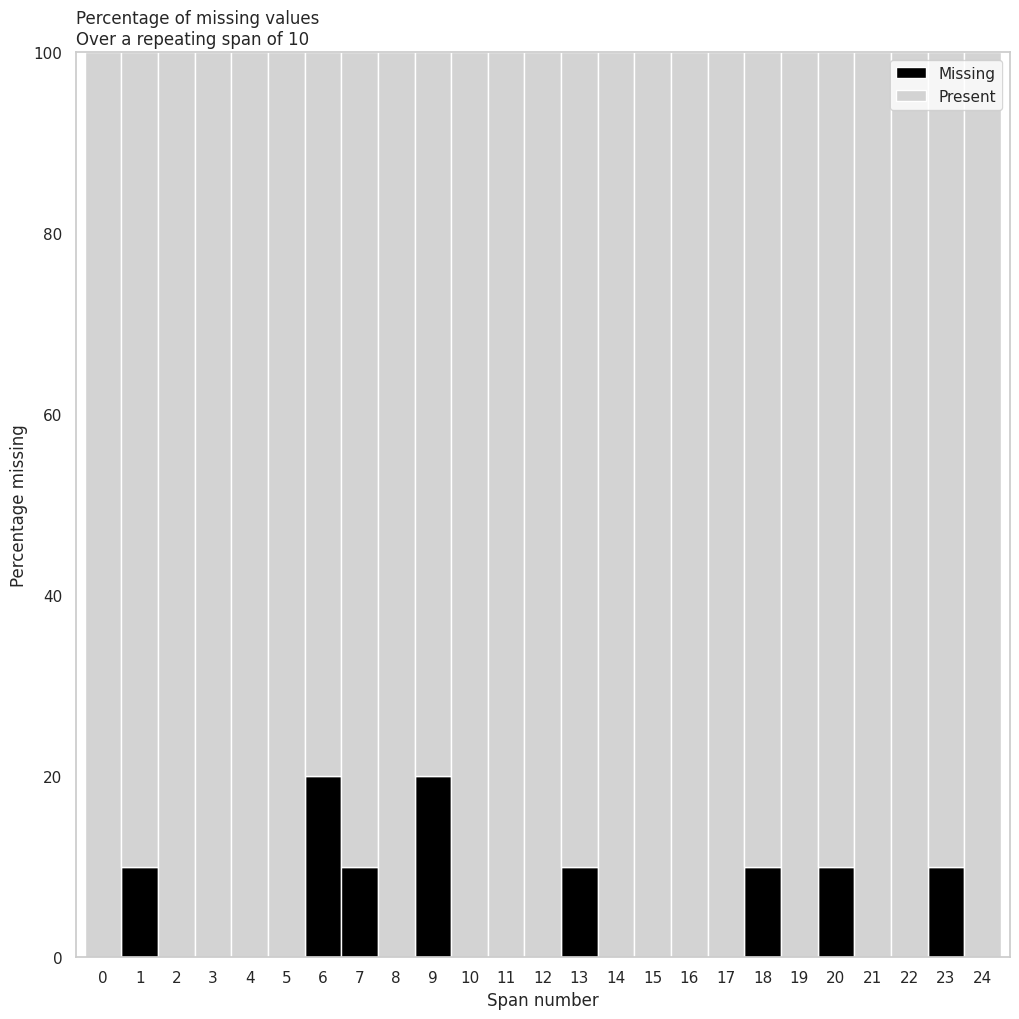

In [81]:
(
    df_riskfactors.missing.missing_variable_span_plot(
        variable='weight_lbs',
        span_every=10,
        rot=0
    )
)

<AxesSubplot:>

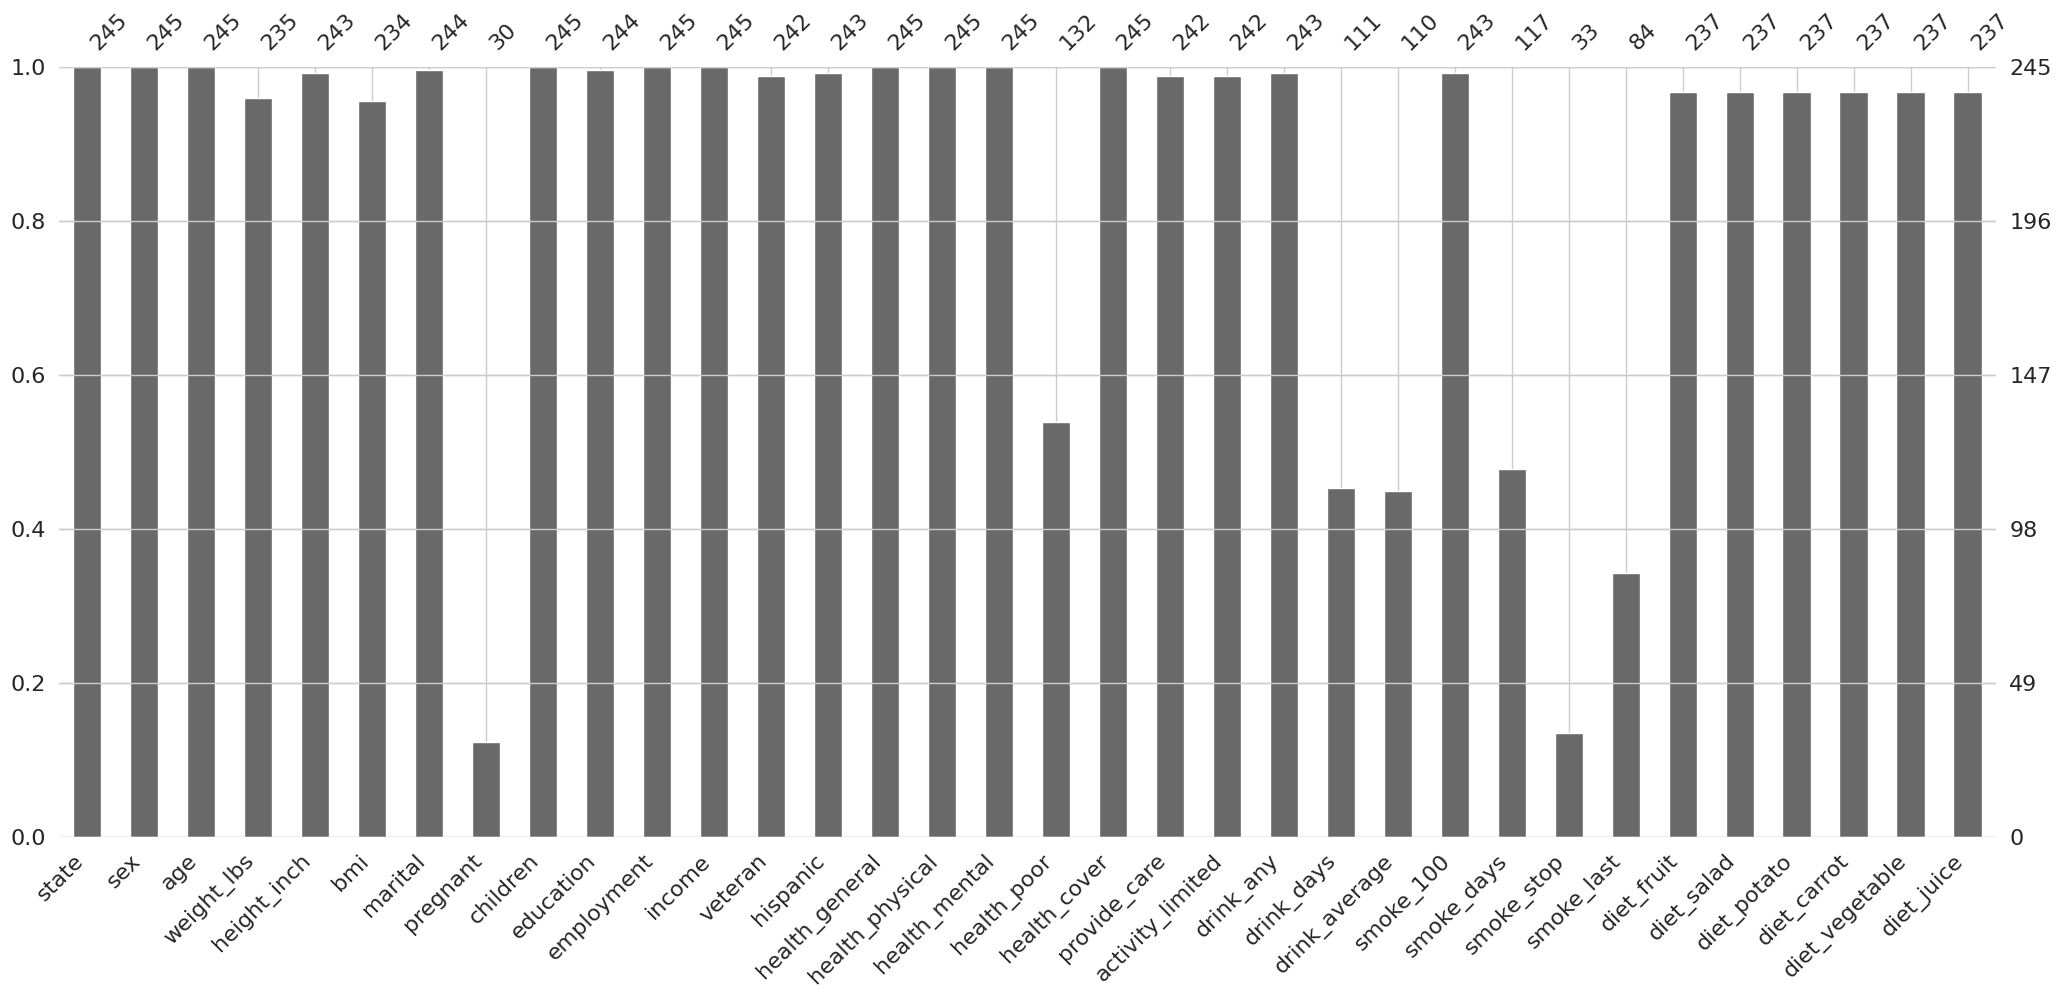

In [83]:
missingno.bar(df=df_riskfactors)

<AxesSubplot:>

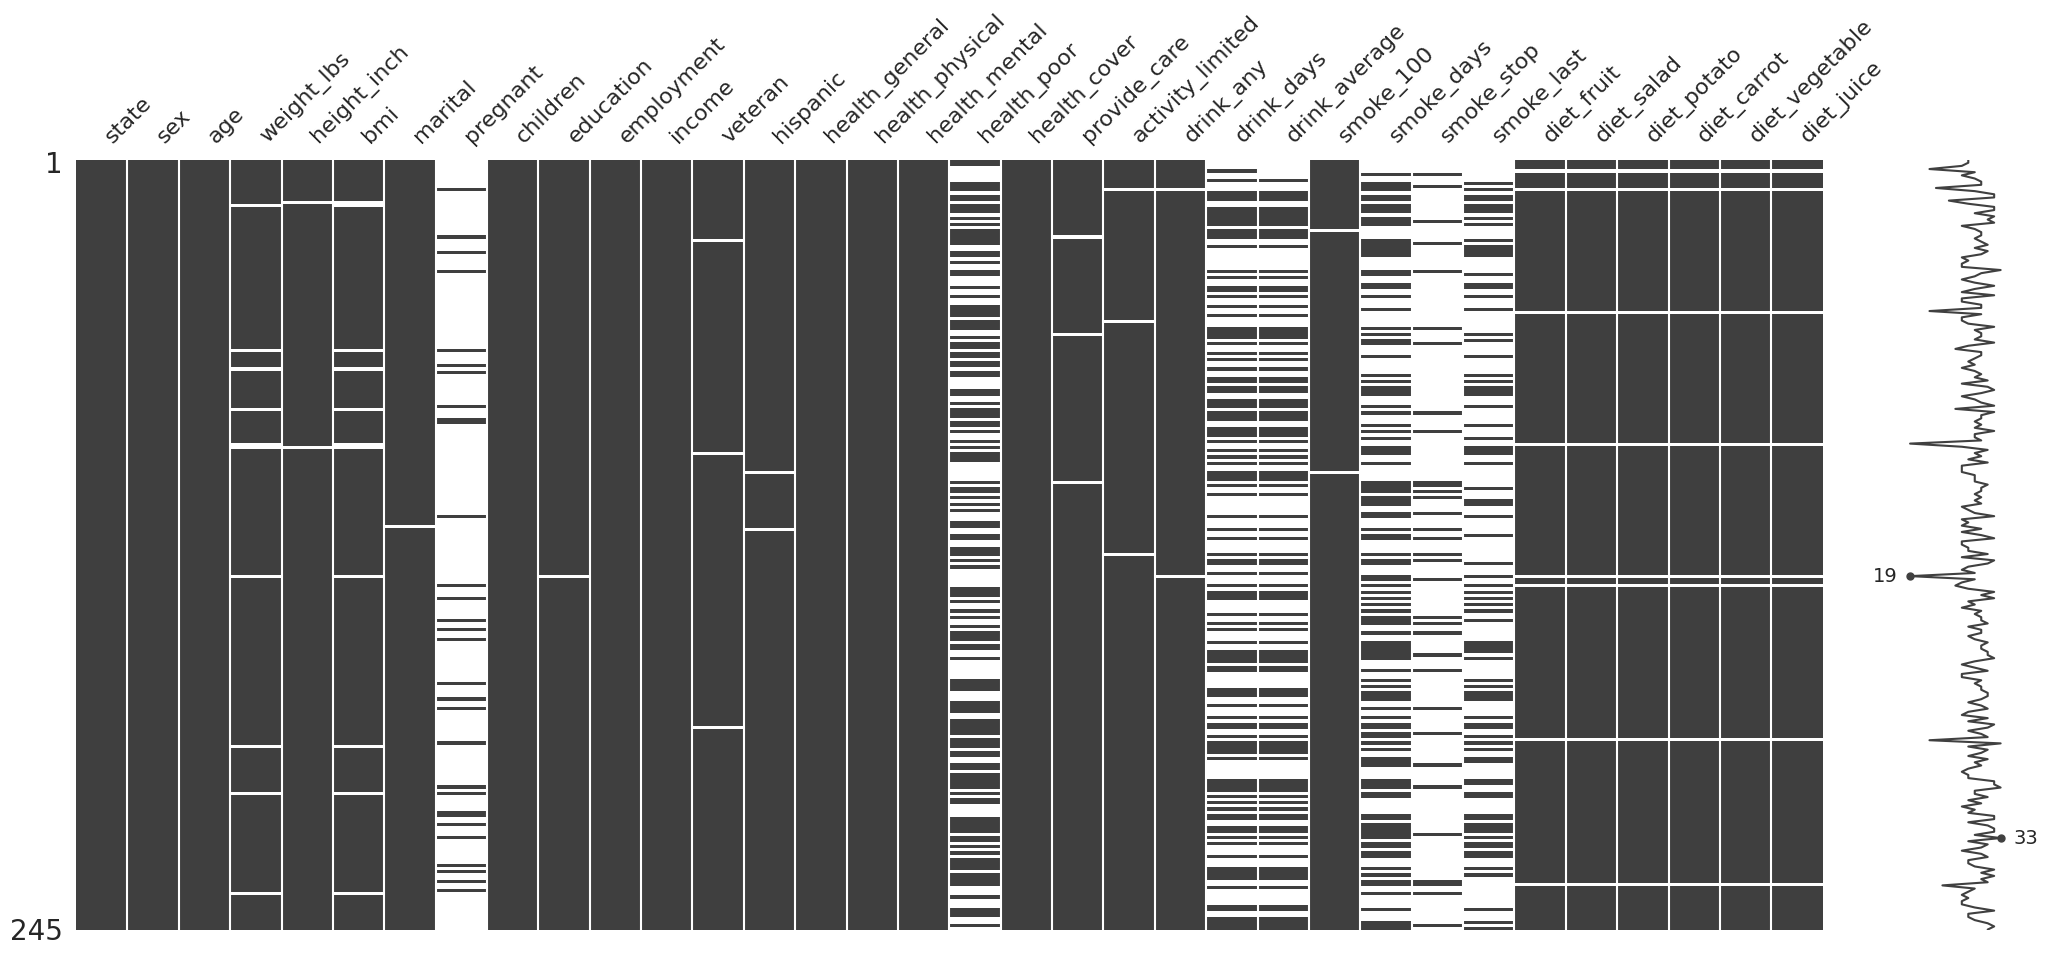

In [84]:
missingno.matrix(df=df_riskfactors)

<AxesSubplot:>

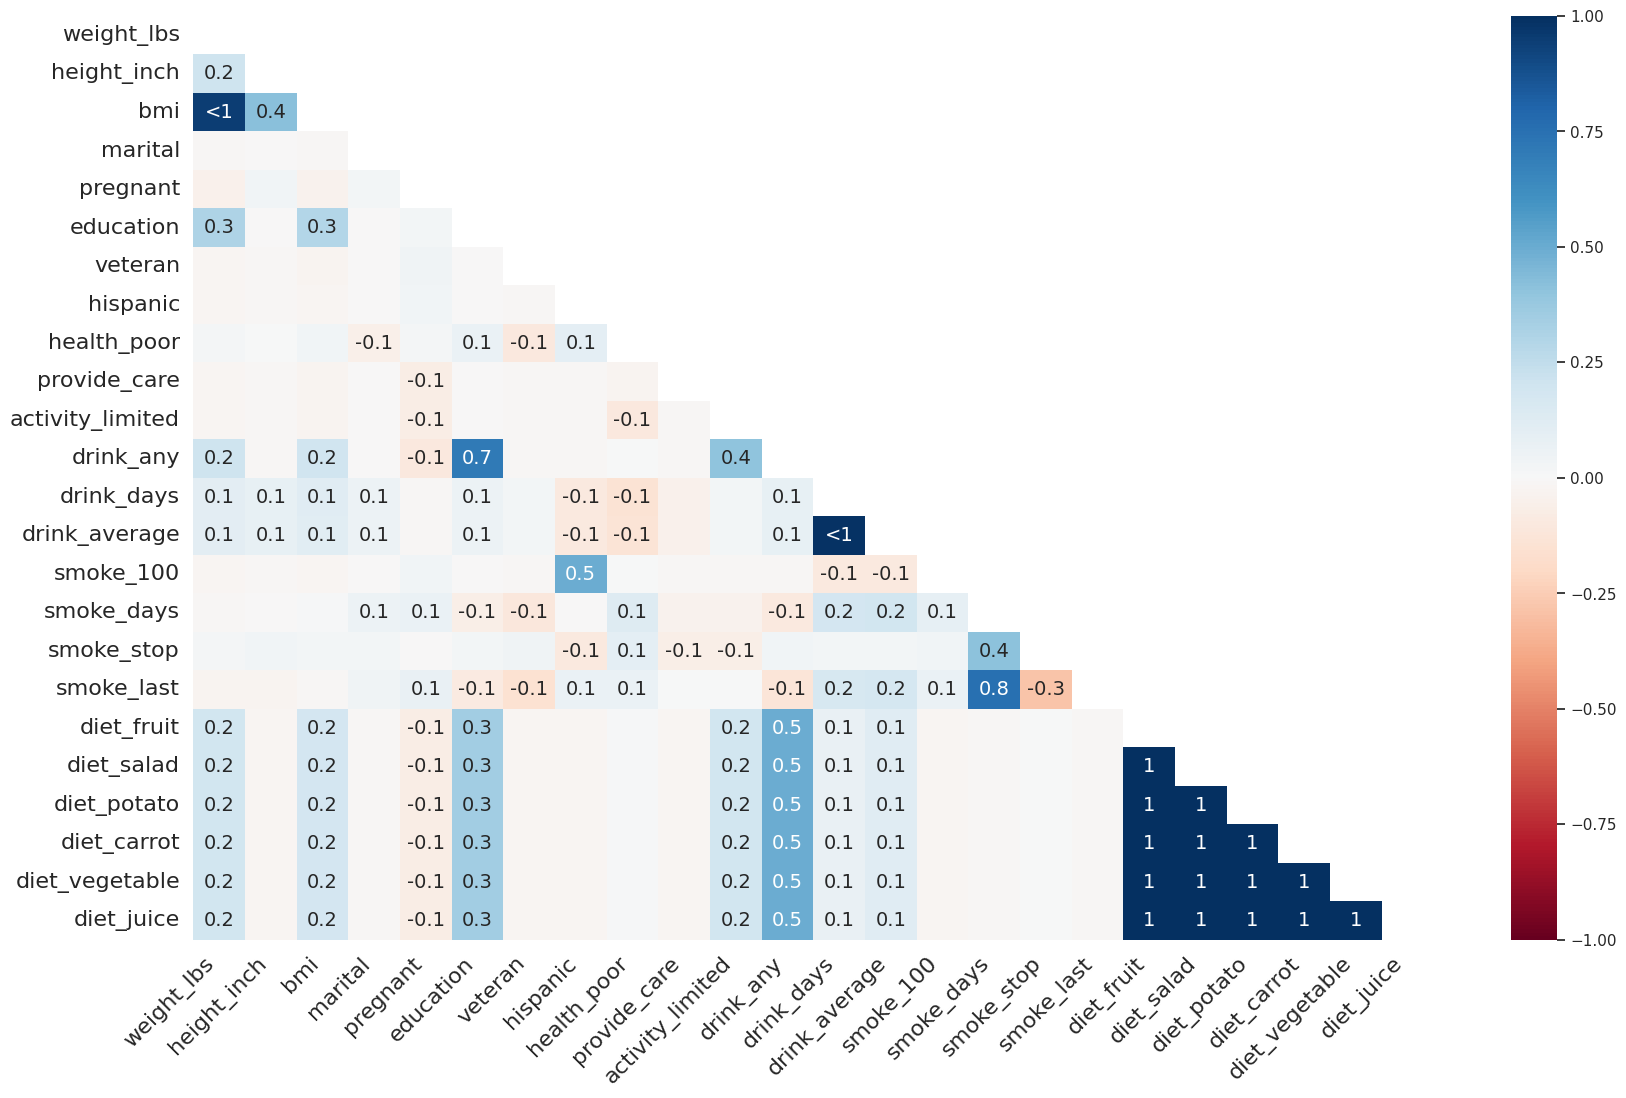

In [82]:
missingno.heatmap(df=df_riskfactors)

In [93]:
(
    df_riskfactors.missing.missing_upsetplot(
        variable=None,
        element_size=60
    )
)

AttributeError: 'MissingMethods' object has no attribute 'missing_upsetplot'